
# PREPARATION DES DONNEES

## 1. IMPORTATION DES LIBRAIRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage plus clair
pd.set_option('display.max_columns', None)

## 2. Chargement du dataset

In [2]:
df = pd.read_csv('../data/customers.csv')

print("Shape:", df.shape)
df.head()


Shape: (36992, 24)


,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [3]:
# Vérifier les valeurs manquantes
df.isnull().sum()

# Types des colonnes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.columns


Index(['unnamed:_0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols


['unnamed:_0',
 'age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

<Figure size 1500x1000 with 0 Axes>

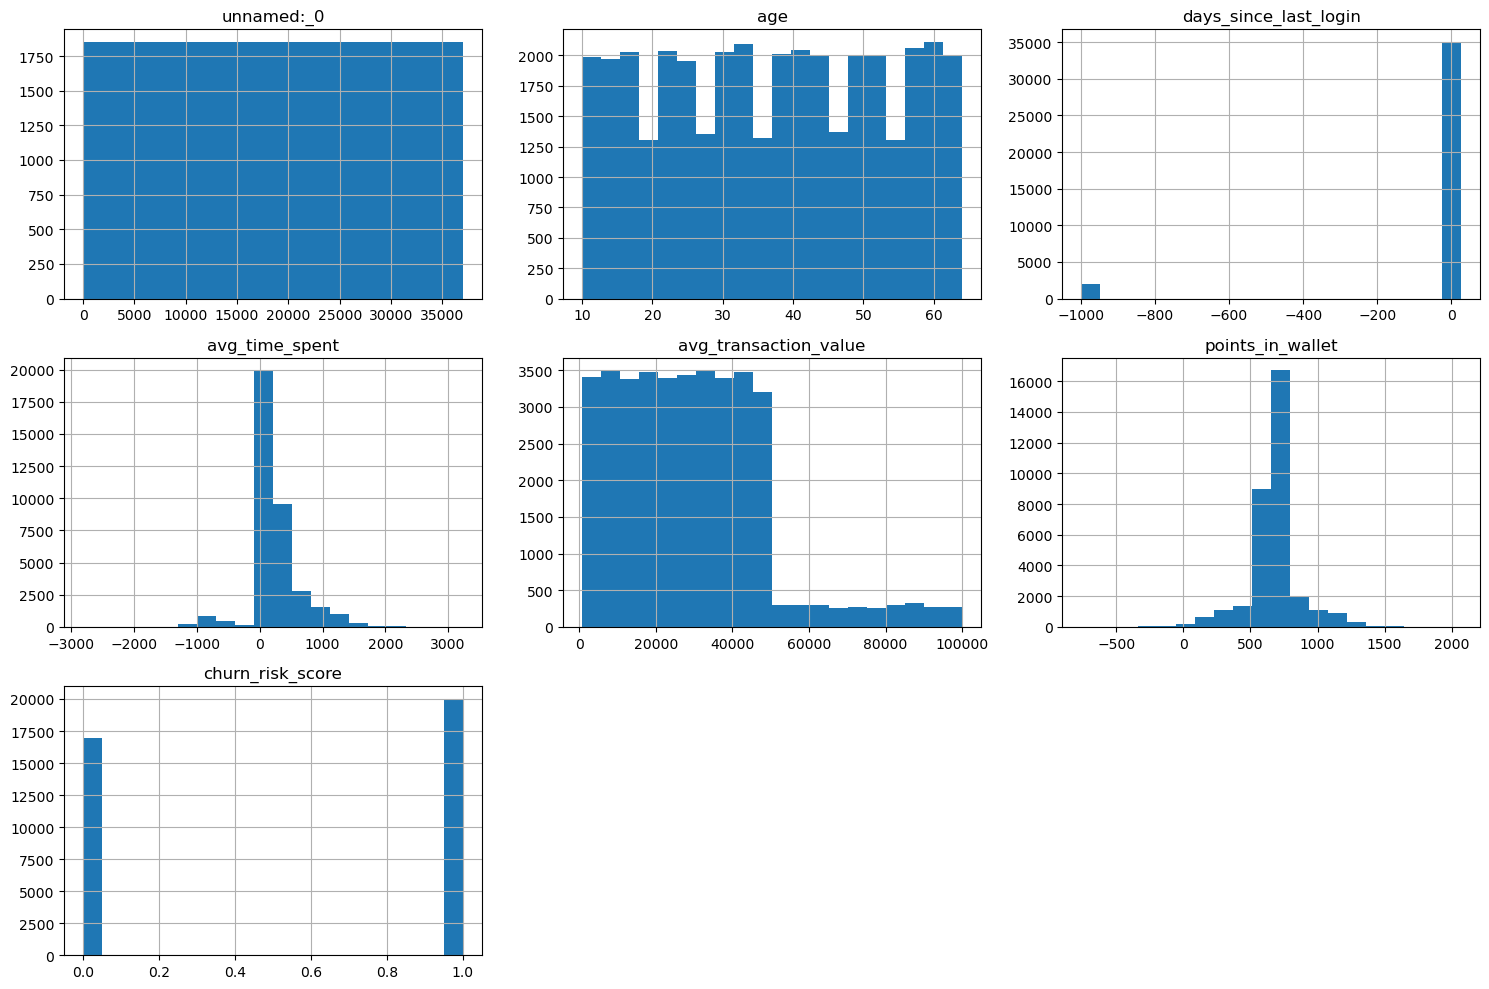

In [6]:
plt.figure(figsize=(15, 10))
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['gender', 'security_no', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

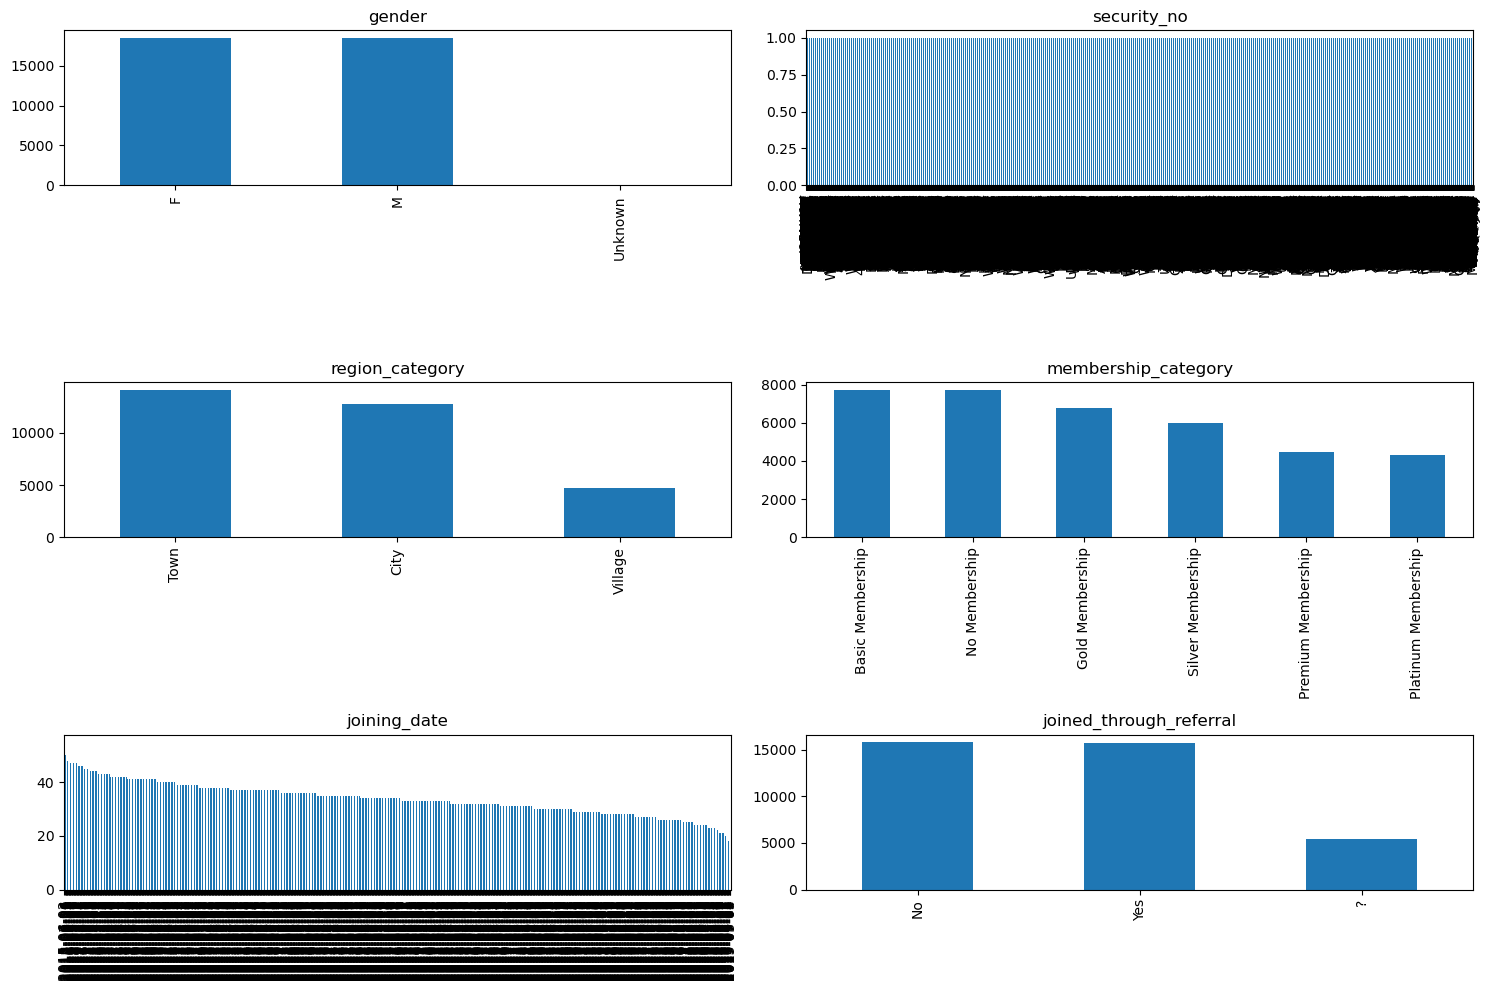

In [8]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:6]):  
    plt.subplot(3, 2, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()


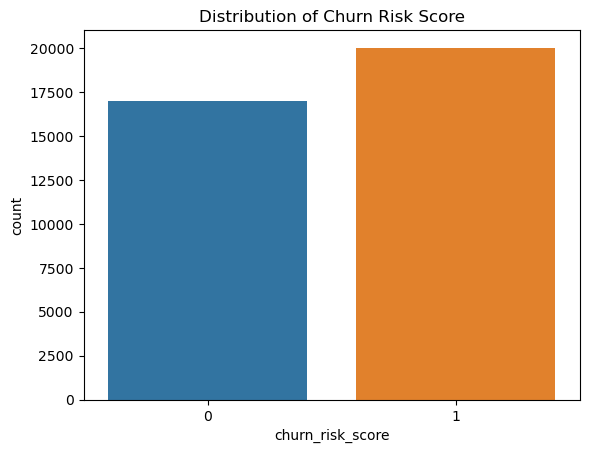

In [9]:
sns.countplot(x=df['churn_risk_score'])
plt.title("Distribution of Churn Risk Score")
plt.show()


In [10]:
# Remplacer les valeurs manquantes dans les colonnes numériques par la médiane
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Remplacer les valeurs manquantes dans les colonnes catégorielles par le mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
target = "churn_risk_score"


In [14]:
X = df.drop(columns=[target,"security_no"])
y = df[target]

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [17]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_prepared.shape, X_test_prepared.shape


((27744, 35556), (9248, 35556))

# ENTRAINEMENTS DES MODELES

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [19]:
log_model = LogisticRegression(max_iter=2000)

log_model.fit(X_train_prepared, y_train)
y_pred_log = log_model.predict(X_test_prepared)

print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))


=== Logistic Regression ===
Accuracy : 0.8602941176470589
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4245
           1       0.87      0.88      0.87      5003

    accuracy                           0.86      9248
   macro avg       0.86      0.86      0.86      9248
weighted avg       0.86      0.86      0.86      9248

[[3564  681]
 [ 611 4392]]


In [20]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_prepared, y_train)
y_pred_rf = rf_model.predict(X_test_prepared)

print("=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Accuracy : 0.928416955017301
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4245
           1       0.93      0.94      0.93      5003

    accuracy                           0.93      9248
   macro avg       0.93      0.93      0.93      9248
weighted avg       0.93      0.93      0.93      9248

[[3880  365]
 [ 297 4706]]


In [21]:
xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train_prepared, y_train)
y_pred_xgb = xgb_model.predict(X_test_prepared)

print("=== XGBoost ===")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


=== XGBoost ===
Accuracy : 0.9316608996539792
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4245
           1       0.92      0.95      0.94      5003

    accuracy                           0.93      9248
   macro avg       0.93      0.93      0.93      9248
weighted avg       0.93      0.93      0.93      9248

[[3859  386]
 [ 246 4757]]


In [22]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
2,XGBoost,0.931661
1,Random Forest,0.928417
0,Logistic Regression,0.860294


In [23]:
importances = rf_model.feature_importances_

# Comme OneHotEncoder transforme en colonnes, on récupère les noms :
encoded_cols = (
    list(numeric_cols)
    + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

feature_importance_df = pd.DataFrame({
    "Feature": encoded_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(20)

feature_importance_df


,Feature,Importance
5,points_in_wallet,0.168908
14,membership_category_No Membership,0.076784
12,membership_category_Basic Membership,0.074764
16,membership_category_Premium Membership,0.055637
15,membership_category_Platinum Membership,0.052002
4,avg_transaction_value,0.035591
3,avg_time_spent,0.015148
0,unnamed:_0,0.015016
13,membership_category_Gold Membership,0.013824
1,age,0.013750


## Meilleur modèle

In [24]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print("Best model:", best_model_name)
print("Accuracy:", best_model_score)


Best model: XGBoost
Accuracy: 0.9316608996539792


In [25]:
!pip install joblib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import joblib

# Dictionnaire pour accéder au bon modèle :
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

best_model = models[best_model_name]

# Sauvegarde
joblib.dump(best_model, "best_churn_model.pkl")

print(f"Saved best model -> best_churn_model.pkl ({best_model_name})")

Saved best model -> best_churn_model.pkl (XGBoost)


In [27]:
joblib.dump(preprocessor, "preprocessor.pkl")
print("Saved preprocessor -> preprocessor.pkl")

Saved preprocessor -> preprocessor.pkl


In [28]:
joblib.dump(preprocessor, "preprocessor.pkl")
print("Saved preprocessor -> preprocessor.pkl")

Saved preprocessor -> preprocessor.pkl
